In [1]:
#!/usr/bin/env python
"""
Description
"""
import os
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from RepresentativeWeeks import *
from misc.RepresentativePeriods import SolarPanelSingleNode

%matplotlib inline

############################################
## PARAMETERS
############################################

In [2]:
num = 5
A = 40000
V = 75e3
P = 3.85e6
print 'A:', str(A)
print 'V:', str(V)
print 'P:', str(P)

A: 40000
V: 75000.0
P: 3850000.0


In [3]:
corr = 'nocorr'
##
############################################

with_corr = {
    4: OrderedDict([(45, 14.0), (118, 12.0), (163, 16.0), (309, 10.0)]),
    5: OrderedDict(
        [(45, 14.0), (118, 12.0), (173, 7.0), (195, 9.0), (309, 10.0)]),
    6: OrderedDict([(45, 14.0), (116, 12.0), (162, 12.0), (225, 3.0), (278,
                                                                       6.0),
                    (307, 5.0)]),
    7: OrderedDict([(34, 6.0), (45, 8.0), (92, 12.0), (166, 8.0), (263, 8.0),
                    (270, 3.0), (318, 7.0)]),
    8: OrderedDict(
        [(34, 6.0), (45, 8.0), (109, 5.0), (132, 7.0), (164, 8.0), (189, 7.0),
         (279, 5.0), (316, 6.0)])
}

corr_no_seasons = {

}
no_corr = {6: OrderedDict(
    [(49, 13.0), (132, 11.0), (164, 11.0), (190, 6.0), (301, 2.0), (339, 9.0)]),
    4: OrderedDict([(45, 14.0), (118, 12.0), (243, 15.0), (309, 11.0)]),
    8: OrderedDict(
        [(10, 2.0), (48, 12.0), (74, 2.0), (100, 10.0), (180, 5.0),
         (188, 7.0), (224, 5.0), (326, 9.0)]),
    7: OrderedDict(
        [(19, 3.0), (34, 6.0), (43, 4.0), (99, 12.0), (166, 9.0),
         (265, 8.0), (316, 10.0)]),
    5: OrderedDict(
        [(2, 7.0), (108, 11.0), (163, 17.0), (275, 11.0), (352, 6.0)])
}

df = pd.DataFrame(columns=['A', 'V', 'P', 'E_repr', 'E_full'])
#if corr == 'nocorr':
#    selection = no_corr[num]
#elif corr == 'corr':
#    selection = with_corr[num]
#elif corr == 'corrnoseasons':
 #   selection = corr_no_seasons[num]

In [4]:
duration_repr = 7

#selection = OrderedDict([(31, 10.0), (45, 7.0), (112, 11.0), (153, 14.0), (170, 7.0), (191, 4.0), (210, 14.0), (270, 21.0), (299, 8.0), (337, 9.0), (359, 5.0), (363, 11.0)])
#selection = OrderedDict([(11, 1.0), (38, 2.0), (87, 9.0), (99, 11.0), (144, 12.0), (196, 4.0), (323, 6.0), (339, 7.0)])
#OrderedDict([(66, 4.0), (84, 11.0), (119, 11.0), (244, 15.0), (333, 5.0), (360, 6.0)])
selection = with_corr[8]
# selection = OrderedDict(
#         [(1, 6.0), (37, 2.0), (71, 9.0), (98, 11.0), (218, 6.0), (228, 6.0), (256, 3.0), (295, 5.0), (354, 4.0)])

In [5]:
print selection

OrderedDict([(34, 6.0), (45, 8.0), (109, 5.0), (132, 7.0), (164, 8.0), (189, 7.0), (279, 5.0), (316, 6.0)])


In [6]:
# Solve representative weeks
repr_model, optimizers = representative(
    duration_repr=duration_repr,
    selection=selection, solArea=A, storVol=V,
    backupPow=P)
energy_sol_repr = None
energy_backup_repr = None
energy_stor_loss_repr = None
energy_curt_repr = None

energy_sol_full = None
energy_curt_full = None
energy_stor_loss_full = None
energy_backup_full = None

status = solve_repr(repr_model)
print 'Representative weeks solved with status', str(status)

if status==0:
    energy_backup_repr = get_backup_energy(
        optimizers, selection)
    energy_stor_loss_repr = get_stor_loss(
        optimizers, selection)
    energy_curt_repr = get_curt_energy(
        optimizers, selection)
    energy_sol_repr = get_sol_energy(
        optimizers, selection)
    if not os.path.isdir(os.path.join('comparison', corr)):
        os.mkdir(os.path.join('comparison', corr))
        # fig1.savefig(os.path.join('comparison', corr, '{}w_{}A_{}V_{}P_repr.png'.format(num, A, V, P)), dpi=300)

01-26 14:12 modesto.parameter.Parameter          INFO     Initializing Parameter Te
01-26 14:12 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
01-26 14:12 modesto.Node                         INFO     Initializing Node Node
01-26 14:12 modesto.component.Component          INFO     Initializing Component storage
01-26 14:12 modesto.parameter.Parameter          INFO     Initializing Parameter Thi
01-26 14:12 modesto.parameter.Parameter          INFO     Initializing Parameter Tlo
01-26 14:12 modesto.parameter.Parameter          INFO     Initializing Parameter mflo_max
01-26 14:12 modesto.parameter.Parameter          INFO     Initializing Parameter volume
01-26 14:12 modesto.parameter.Parameter          INFO     Initializing Parameter ar
01-26 14:12 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
01-26 14:12 modesto.parameter.Parameter          INFO     Initializing Parameter kIns
01-26 14:12 modesto.parameter.Parameter          INFO     

zeta H is: 0.999993178573


01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter kIns
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter heat_stor
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter reps
01-26 14:13 modesto.Node                         INFO     Component storage added to Node
01-26 14:13 modesto.component.Component          INFO     Initializing Component backup
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter efficiency
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter PEF
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter CO2
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter fuel_cost
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Qmax
01-26 14:13 modesto.parameter.Para

zeta H is: 0.999993178573


01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
01-26 14:13 modesto.Node                         INFO     Initializing Node Node
01-26 14:13 modesto.component.Component          INFO     Initializing Component storage
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Thi
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Tlo
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter mflo_max
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter volume
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter ar
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter kIns
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter heat_stor
01-26 14:13 modesto.parameter.Parameter          IN

zeta H is: 0.999993178573


01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter reps
01-26 14:13 modesto.Node                         INFO     Component storage added to Node
01-26 14:13 modesto.component.Component          INFO     Initializing Component backup
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter efficiency
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter PEF
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter CO2
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter fuel_cost
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Qmax
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter ramp
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter ramp_cost
01-26 14:13 modesto.components.VarProducer       INFO     Initializing VarProducer backup
01-26 14:13 modesto.Node      

zeta H is: 0.999993178573


01-26 14:13 modesto.Node                         INFO     Compilation of Node finished
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Te
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
01-26 14:13 modesto.Node                         INFO     Initializing Node Node
01-26 14:13 modesto.component.Component          INFO     Initializing Component storage
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Thi
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Tlo
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter mflo_max
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter volume
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter ar
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
01-26 14:13 modesto.parameter.Parameter          INFO    

zeta H is: 0.999993178573


01-26 14:13 modesto.component.Component          INFO     Initializing Component storage
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Thi
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Tlo
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter mflo_max
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter volume
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter ar
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter kIns
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter heat_stor
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter reps
01-26 14:13 modesto.Node                         INFO     Component storage added to Node
01-26 14:13 modesto.component.Component 

zeta H is: 0.999993178573


01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter ar
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter kIns
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter heat_stor
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter reps
01-26 14:13 modesto.Node                         INFO     Component storage added to Node
01-26 14:13 modesto.component.Component          INFO     Initializing Component backup
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter efficiency
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter PEF
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter CO2
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter fuel_cost
01-26 14:13 modesto.parameter.Parame

zeta H is: 0.999993178573


01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Te
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
01-26 14:13 modesto.Node                         INFO     Initializing Node Node
01-26 14:13 modesto.component.Component          INFO     Initializing Component storage
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Thi
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Tlo
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter mflo_max
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter volume
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter ar
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter kIns
01-26 14:13 modesto.parameter.Parameter          INFO     

zeta H is: 0.999993178573
State equation added for storage Node.storage in representative week starting on day 316
State equation added for storage Node.storage in representative week starting on day 34
State equation added for storage Node.storage in representative week starting on day 45
State equation added for storage Node.storage in representative week starting on day 109
State equation added for storage Node.storage in representative week starting on day 132
State equation added for storage Node.storage in representative week starting on day 164
State equation added for storage Node.storage in representative week starting on day 189
State equation added for storage Node.storage in representative week starting on day 279
Writing time: 2.63700008392
Academic license - for non-commercial use only
Read MIP start from file c:\users\u0094934\appdata\local\temp\tmpkfgafx.gurobi.mst
Changed value of parameter NumericFocus to 1
   Prev: 0  Min: 0  Max: 3  Default: 0
Optimize a model with 

In [7]:
full_model = SolarPanelSingleNode.fullyear(storVol=V, solArea=A,
                                           backupPow=P)

status = SolarPanelSingleNode.solve_fullyear(full_model)
print 'Full optimization solved with status', str(status)

if status == 0:
    energy_backup_full = SolarPanelSingleNode.get_backup_energy(
        full_model)
    energy_stor_loss_full = SolarPanelSingleNode.get_stor_loss(
        full_model)
    energy_curt_full = SolarPanelSingleNode.get_curt_energy(
        full_model)
    energy_sol_full = \
        SolarPanelSingleNode.get_sol_energy(full_model)
    energy_full = SolarPanelSingleNode.get_backup_energy(full_model)
    #fig2 = SolarPanelSingleNode.plot_single_node(full_model)
    # fig2.savefig(os.path.join('comparison', corr, '{}w_{}A_{}V_{}P_full.png'.format(num, A, V, P)), dpi=300)

01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Te
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
01-26 14:13 modesto.Node                         INFO     Initializing Node Node
01-26 14:13 modesto.component.Component          INFO     Initializing Component storage
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Thi
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter Tlo
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter mflo_max
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter volume
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter ar
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
01-26 14:13 modesto.parameter.Parameter          INFO     Initializing Parameter kIns
01-26 14:13 modesto.parameter.Parameter          INFO     

Writing time: 17.378000021
Academic license - for non-commercial use only
Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Optimize a model with 122643 rows, 96364 columns and 245283 nonzeros
Coefficient statistics:
  Matrix range     [6e-06, 2e+05]
  Objective range  [1e-03, 1e+00]
  Bounds range     [4e+06, 2e+12]
  RHS range        [5e-11, 1e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 116309 rows and 79425 columns
Presolve time: 0.16s
Presolved: 6334 rows, 16939 columns, 23273 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 6.334e+03
 Factor NZ  : 1.076e+05 (roughly 10 MBytes of memory)
 Factor Ops : 2.270e+06 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Pri

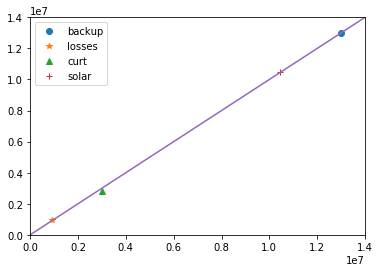

In [8]:
fig, ax = plt.subplots()

ax.plot(energy_backup_full, energy_backup_repr, 'o', label='backup')
ax.plot(energy_stor_loss_full, energy_stor_loss_repr, '*', label='losses')
ax.plot(energy_curt_full, energy_curt_repr, '^', label='curt')
ax.plot(energy_sol_full, energy_sol_repr, '+', label='solar')

x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

ax.legend()

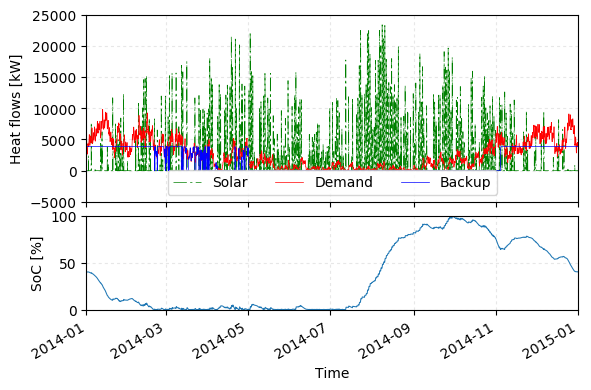

In [11]:
fig, axs = plt.subplots(2, 1, sharex=True,
                            gridspec_kw=dict(height_ratios=[2, 1]))

# axs[0].plot(optmodel.get_result('heat_flow', node='Node', comp='storage'), label='storage_HF')
axs[0].plot(full_model.get_result('heat_flow', node='Node', comp='solar')/1e3,
            'g', linestyle='-.', label='Solar', linewidth=0.5)
axs[0].plot(full_model.get_result('heat_flow', node='Node', comp='demand')/1e3,
            'r', label='Demand', linewidth=0.5)
axs[0].plot(full_model.get_result('heat_flow', node='Node', comp='backup')/1e3,
            'b', label='Backup', linewidth=0.5)
axs[0].legend(ncol=3, loc='lower center')

axs[0].set_ylabel('Heat flows [kW]')

#axs[0].set_title('Full year')

# axs[1].plot(optmodel.get_result('heat_stor', node='Node', comp='storage'), label='stor_E')
# axs[1].legend()

axs[1].plot(full_model.get_result('soc', node='Node', comp='storage'),
            label='SoC', linewidth=0.75)
#axs[1].legend()

axs[1].set_ylabel('SoC [%]')

axs[-1].set_xlabel('Time')

# axs[3].plot(optmodel.get_result('heat_flow_curt', node='Node', comp='solar'), label='Curt Heat')
# axs[3].legend()

for ax in axs:
    ax.grid(alpha=0.3, linestyle=':')

plt.gcf().autofmt_xdate()
fig.tight_layout()
fig.figsize = (8, 6)
fig.dpi = 100
fig.subplots_adjust(wspace=0.1, hspace=0.1)
fig.savefig('FullYear.png', dpi=400)

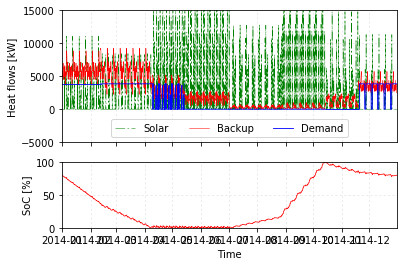

In [12]:
%matplotlib inline
opt = optimizers

fig_out, axs = plt.subplots(2, 1, sharex=True, gridspec_kw=dict(height_ratios=[2, 1]))
start_d = pd.Timestamp('20140101')
next_d = start_d

prev_curt = 0

for startD, num_reps in selection.iteritems():
    # Heat flows
    axs[0].plot(
        construct_heat_flow(name='heat_flow', comp='solar', node='Node',
                            optimizer=opt[startD], reps=num_reps,
                            start_date=next_d)/1e3,
        color='g', linestyle = '-.', linewidth=0.5)
    axs[0].plot(
        construct_heat_flow(name='heat_flow', comp='demand', node='Node',
                            optimizer=opt[startD], reps=num_reps,
                            start_date=next_d)/1e3,
        color='r', linewidth=0.5)
    axs[0].plot(
        construct_heat_flow(name='heat_flow', comp='backup', node='Node',
                            optimizer=opt[startD], reps=num_reps,
                            start_date=next_d)/1e3,
        color='b', linewidth=0.85)

    # Storage state
    results = opt[startD].get_component(name='storage',
                                        node='Node').get_soc()
    date_ind = pd.DatetimeIndex(start=next_d, freq='1H',
                                periods=len(results))
    axs[1].plot(date_ind, results, color='r', label=str(startD), linewidth=0.75)

    next_d = next_d + pd.Timedelta(days=duration_repr * num_reps)

axs[0].legend(['Solar', 'Backup', 'Demand'], loc='lower center', ncol=3)
#axs[0].set_title('Representative')

axs[0].set_ylim(-5e3, 15e3)

axs[0].set_ylabel('Heat flows [kW]')
axs[1].set_ylabel('SoC [%]')

axs[1].set_xlabel('Time')

for ax in axs:
    ax.grid(alpha=0.3, linestyle=':')
#plt.gcf().autofmt_xdate()

#fig_out.tight_layout()
#fig_out.figsize=(8,6)
#fig_out.dpi = 100
#fig_out.subplots_adjust(wspace=0.1, hspace=0.1)

In [13]:
fig_out.savefig('ReprYear8w.png', dpi=400)

plt.show()

In [14]:
print energy_backup_full/1e6
print energy_sol_full/1e6
print energy_stor_loss_full/1e6
print energy_curt_full/1e6
print SolarPanelSingleNode.get_demand_energy(full_model)/1e6

print (energy_backup_full+energy_sol_full-energy_stor_loss_full)/1e6

13.00495165
10.4572979511
0.931935084992
3.01063820977
22.5303145161
22.5303145161


In [15]:
print energy_backup_repr/1e6
print energy_sol_repr/1e6
print energy_stor_loss_repr/1e6
print energy_curt_repr/1e6
print get_demand_energy(optimizers, selection)/1e6

print (energy_backup_repr+energy_sol_repr-energy_stor_loss_repr)/1e6

12.9699338487
10.4763841552
0.936057204371
2.84412512859
22.5102607995
22.5102607996


In [16]:
print energy_backup_repr/1e6
print full_model.get_result('heat_flow', node='Node', comp='backup').sum()/1e9/0.95

12.9699338487
13.6894227894


In [27]:
print energy_curt_full

3010638.20977


In [28]:
print energy_curt_repr

1325328.3607


In [29]:
(energy_backup_full-energy_backup_repr)/energy_backup_full

0.10416131611303976

In [30]:
value(full_model.model.Slack)

0.0

In [31]:
for i in full_model.model.Node.backup.component_objects():
    print i

Node.backup.heat_flow
Node.backup.ramping_cost
Node.backup.mass_flow
Node.backup.decl_upward_ramp
Node.backup.decl_downward_ramp
Node.backup.decl_downward_ramp_cost
Node.backup.decl_upward_ramp_cost


In [32]:
repr_sol=[]
for startD, opt in optimizers.iteritems():
    num_reps = selection[startD]
    repr_sol.extend(construct_heat_flow(name='heat_flow', comp='solar', node='Node',
                            optimizer=optimizers[startD], reps=num_reps,
                            start_date=next_d).values)
    
len(repr_sol)

repr_sol = sorted(repr_sol, reverse=True)

In [33]:
full_sol = sorted(full_model.get_result('heat_flow', node='Node', comp='solar'), reverse=True)
len(full_sol)

8760

In [36]:
%matplotlib inline

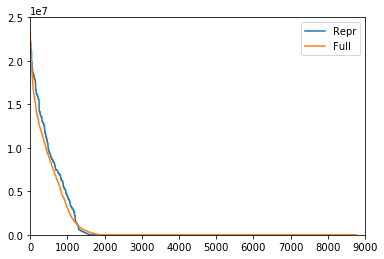

In [37]:
fig, ax = plt.subplots()
ax.plot(repr_sol, label='Repr')
ax.plot(full_sol, label='Full')
ax.legend()